### Word clouds

I will try to make word clouds that are made in the shape of the country in question and that have words from the topics of reports from that country. If there is no shape for the country, the cloud will be of a square shape

In [1]:
import pandas as pd
from wordcloud import WordCloud
import geopandas
import json

In [3]:
filename = "../data/country_geo_topic_counts.gpkg"
reut_country_geo_topic = geopandas.read_file(filename)
reut_country_geo_topic.set_index('index', inplace=True)
reut_country_geo_topic['topiccounts'] = reut_country_geo_topic['topiccounts'].apply(eval)
reut_country_geo_topic 

,count,pop_est,continent,iso_a3,gdp_md_est,topiccounts,geometry
index,,,,,,,
AFGHANISTAN,181.0,3.412481e+07,Asia,AFG,64080.0,"{'MERCHANDISE TRADE': 1, 'ARTS, CULTURE, ENTER...","POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
ALBANIA,632.0,3.047987e+06,Europe,ALB,33900.0,"{'SHARE LISTINGS': 1, 'COMMODITY MARKETS': 1, ...","POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
ALGERIA,109.0,4.096944e+07,Africa,DZA,609400.0,"{'PRODUCTION/SERVICES': 1, 'HUMAN INTEREST': 1...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
ANDORRA,8.0,NaN,None,None,NaN,"{'GOVERNMENT/SOCIAL': 8, 'SPORTS': 8}",None
ANGOLA,163.0,2.931027e+07,Africa,AGO,189000.0,"{'BIOGRAPHIES, PERSONALITIES, PEOPLE': 1, 'GOV...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...,...
YUGOSLAVIA,654.0,NaN,None,None,NaN,"{'INSOLVENCY/LIQUIDITY': 1, 'ASSET TRANSFERS':...",None
ZAIRE,624.0,NaN,None,None,NaN,"{'OBITUARIES': 1, 'CRIME, LAW ENFORCEMENT': 1,...",None
ZAMBIA,182.0,1.597200e+07,Africa,ZMB,65170.0,"{'HEALTH': 1, 'LOANS/CREDITS': 1, 'BALANCE OF ...","POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


In [46]:
reut_country_geo_topic.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 206 entries, AFGHANISTAN to ZIMBABWE
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   count        206 non-null    int64   
 1   pop_est      162 non-null    float64 
 2   continent    162 non-null    object  
 3   iso_a3       162 non-null    object  
 4   gdp_md_est   162 non-null    float64 
 5   topiccounts  206 non-null    object  
 6   geometry     162 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 12.9+ KB


In [4]:
finland_dict =  reut_country_geo_topic.loc['FINLAND']['topiccounts']
finland_dict

{'CONSUMER CREDIT': 1,
 'BIOGRAPHIES, PERSONALITIES, PEOPLE': 1,
 'DEFENCE': 1,
 'CAPACITY UTILIZATION': 1,
 'ENERGY MARKETS': 2,
 'WELFARE, SOCIAL SERVICES': 2,
 'ELECTIONS': 2,
 'WAR, CIVIL WAR': 2,
 'HOUSING STARTS': 2,
 'ARTS, CULTURE, ENTERTAINMENT': 2,
 'BALANCE OF PAYMENTS': 2,
 'DOMESTIC MARKETS': 2,
 'EC AGRICULTURE POLICY': 2,
 'INSOLVENCY/LIQUIDITY': 2,
 'RETAIL SALES': 3,
 'LEGAL/JUDICIAL': 3,
 'WEATHER': 4,
 'SCIENCE AND TECHNOLOGY': 4,
 'ADVERTISING/PROMOTION': 4,
 'EC COMPETITION/SUBSIDY': 4,
 'CREDIT RATINGS': 5,
 'LOANS/CREDITS': 5,
 'EC INSTITUTIONS': 6,
 'METALS TRADING': 6,
 'PERSONAL INCOME': 6,
 'EC CORPORATE POLICY': 6,
 'CRIME, LAW ENFORCEMENT': 7,
 'EC EXTERNAL RELATIONS': 8,
 'MONEY SUPPLY': 8,
 'ENVIRONMENT AND NATURAL WORLD': 8,
 'RESEARCH/DEVELOPMENT': 8,
 'PRIVATISATIONS': 9,
 'HUMAN INTEREST': 10,
 'MARKET SHARE': 10,
 'MONOPOLIES/COMPETITION': 10,
 'CONSUMER FINANCE': 10,
 'UNEMPLOYMENT': 11,
 'INDUSTRIAL PRODUCTION': 11,
 'MANAGEMENT MOVES': 11,
 'DISAS

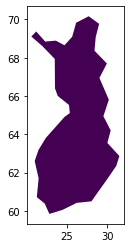

In [52]:
reut_country_geo_topic.loc[['FINLAND']].plot('count')

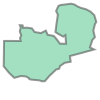

In [55]:
# This returns a Pologon object

zambia = reut_country_geo_topic.loc['ZAMBIA', 'geometry']
zambia

In [56]:
type(zambia)

shapely.geometry.polygon.Polygon

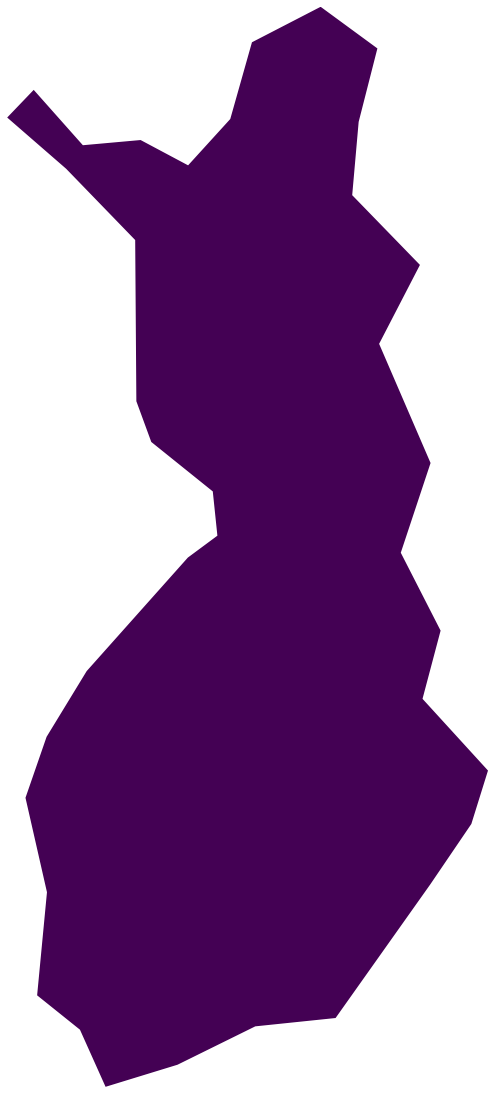

In [5]:
import matplotlib.pyplot as plt

finland = plt.figure(figsize=(15,15))
ax = finland.add_axes([0, 0, 1, 1])
ax.axis('off')

ax.margins(0)
reut_country_geo_topic.loc[['FINLAND']].plot('count', ax=ax)
plt.savefig('../pics/finland.png', bbox_inches="tight", pad_inches=0)


### Make algorithm to match the colors to the frequency

As the default solution is to use random colors, this algorithm uses the frequency in determining the color.

In [20]:
class Freq_colormap_color_func(object):
    """Color func created from matplotlib colormap.

    Parameters
    ----------
    colormap : string or matplotlib colormap
    word_dict : dictionary that has word frequencies
    Example
    -------
    >>> WordCloud(color_func=colormap_color_func('magma', word_dict))

    """
    def __init__(self, colormap, word_dict):
        import matplotlib.pyplot as plt
        self.colormap = plt.cm.get_cmap(colormap)
        self.freq_max = list(word_dict.values())[-1]
        self.word_dict = word_dict
        

    def __call__(self, word, **kwargs):
        freq = self.word_dict.get(word)/self.freq_max
        r, g, b, _ = np.maximum(0, 255 * np.array(self.colormap(
            freq)))
        return "rgb({:.0f}, {:.0f}, {:.0f})".format(r, g, b)

(-0.5, 479.5, 1079.5, -0.5)

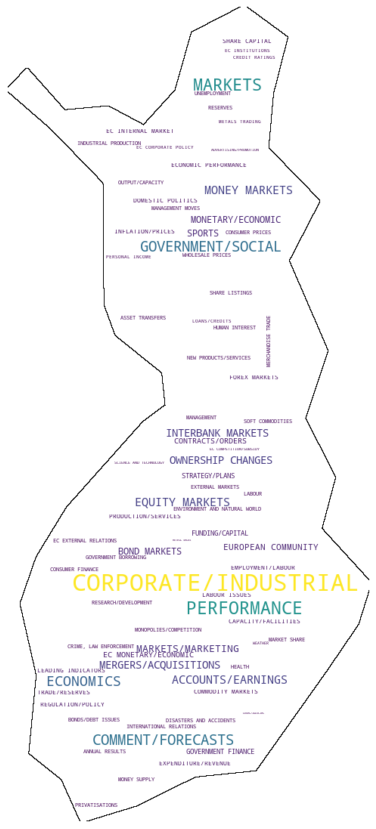

In [21]:
# testing frequency colors

import numpy as np
from PIL import Image


own_colour_func = Freq_colormap_color_func('viridis', finland_dict)

finland_mask =  np.array(Image.open("../pics/finland.png"))
finland_cloud = WordCloud(background_color="white", mask=finland_mask, contour_width=1,  width=1000, height=1000, color_func=own_colour_func)
finland_cloud.generate_from_frequencies(finland_dict)


plt.figure(figsize=(15,15))
plt.imshow(finland_cloud, interpolation='bilinear')
plt.axis("off")



### Testing other countries

In [ ]:
# Zambia
zambia_dict =  reut_country_geo_topic.loc['ZAMBIA']['topiccounts']
zambia = plt.figure(figsize=(12, 12))
ax = zambia.add_axes([0, 0, 1, 1])
ax.axis('off')

ax.margins(0)
zambia = reut_country_geo_topic.loc[['ZAMBIA']].plot('count', ax=ax)
plt.savefig('../pics/zambia.png', bbox_inches="tight", pad_inches=0)

zambia_mask =  np.array(Image.open("../pics/zambia.png"))
zambia_cloud = WordCloud(background_color="white", mask=zambia_mask,  contour_width=1)
zambia_cloud.generate_from_frequencies(zambia_dict)

plt.figure(figsize=(12, 12))
plt.imshow(zambia_cloud, interpolation='bilinear')
plt.axis("off")


In [114]:
from PIL import Image

pic = Image.open(f'../pics/TURKEY.png')

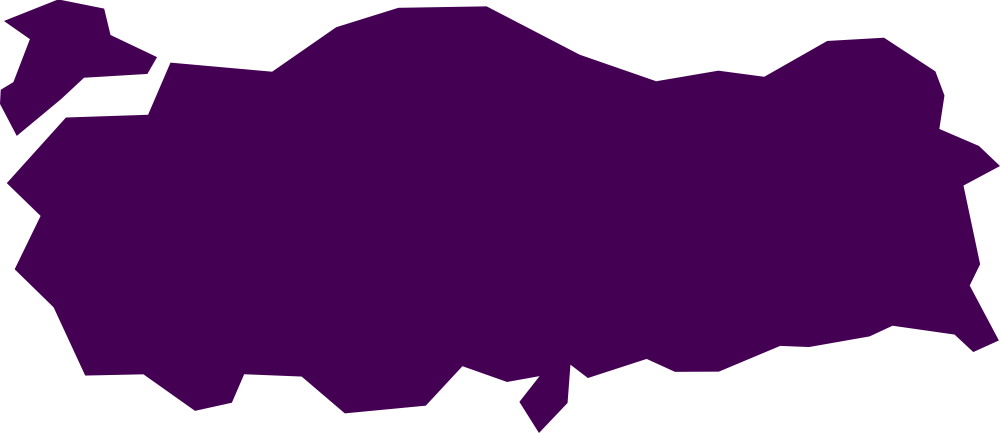

In [115]:
pic

### World overview

Let's add world row to the dataframe, to create overview from it


In [6]:
sums = reut_country_geo_topic.sum()
sums

count         2.997710e+05
pop_est       7.354229e+09
gdp_md_est    1.178827e+08
dtype: float64

In [8]:
world_f = open('../data/all_topic_counts.json',)
world_dict = json.load(world_f)
world_dict

{'MILLENNIUM ISSUES': 4,
 'EC GENERAL': 8,
 'CAPACITY UTILIZATION': 19,
 'INVENTORIES': 38,
 'EC ENVIRONMENT ISSUES': 55,
 'CONSUMER CREDIT': 70,
 'HOUSING STARTS': 122,
 'FASHION': 141,
 'PERSONAL INCOME': 162,
 'TRAVEL AND TOURISM': 187,
 'OBITUARIES': 301,
 'WHOLESALE PRICES': 348,
 'MARKET SHARE': 381,
 'DEFENCE CONTRACTS': 401,
 'RETAIL SALES': 432,
 'INSOLVENCY/LIQUIDITY': 591,
 'INDUSTRIAL PRODUCTION': 619,
 'WELFARE, SOCIAL SERVICES': 664,
 'EC CORPORATE POLICY': 671,
 'EC INSTITUTIONS': 704,
 'MONEY SUPPLY': 747,
 'UNEMPLOYMENT': 760,
 'EC AGRICULTURE POLICY': 761,
 'CONSUMER FINANCE': 778,
 'EC COMPETITION/SUBSIDY': 801,
 'OUTPUT/CAPACITY': 857,
 'ADVERTISING/PROMOTION': 919,
 'BALANCE OF PAYMENTS': 949,
 'RESEARCH/DEVELOPMENT': 958,
 'HUMAN INTEREST': 975,
 'SCIENCE AND TECHNOLOGY': 989,
 'RELIGION': 989,
 'RESERVES': 1019,
 'LOANS/CREDITS': 1043,
 'EC INTERNAL MARKET': 1101,
 'ARTS, CULTURE, ENTERTAINMENT': 1310,
 'CREDIT RATINGS': 1358,
 'DOMESTIC MARKETS': 1423,
 'EC EXTE

In [16]:
world_row = pd.DataFrame([[2.997710e+05, 7.354229e+09, None, None, 1.178827e+08, world_dict, None]], columns=['count','pop_est', 'continent','iso_a3', 'gdp_md_est','topiccounts','geometry'], index=['WORLD'])
world_row

,count,pop_est,continent,iso_a3,gdp_md_est,topiccounts,geometry
WORLD,299771.0,7.354229e+09,None,None,117882700.0,"{'MILLENNIUM ISSUES': 4, 'EC GENERAL': 8, 'CAP...",None


In [30]:
reut_country_geo_topic = reut_country_geo_topic.append(world_row)
reut_country_geo_topic

,count,pop_est,continent,iso_a3,gdp_md_est,topiccounts,geometry
AFGHANISTAN,181.0,3.412481e+07,Asia,AFG,64080.0,"{'MERCHANDISE TRADE': 1, 'ARTS, CULTURE, ENTER...","POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
ALBANIA,632.0,3.047987e+06,Europe,ALB,33900.0,"{'SHARE LISTINGS': 1, 'COMMODITY MARKETS': 1, ...","POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
ALGERIA,109.0,4.096944e+07,Africa,DZA,609400.0,"{'PRODUCTION/SERVICES': 1, 'HUMAN INTEREST': 1...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
ANDORRA,8.0,NaN,None,None,NaN,"{'GOVERNMENT/SOCIAL': 8, 'SPORTS': 8}",None
ANGOLA,163.0,2.931027e+07,Africa,AGO,189000.0,"{'BIOGRAPHIES, PERSONALITIES, PEOPLE': 1, 'GOV...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...,...
YUGOSLAVIA,654.0,NaN,None,None,NaN,"{'INSOLVENCY/LIQUIDITY': 1, 'ASSET TRANSFERS':...",None
ZAIRE,624.0,NaN,None,None,NaN,"{'OBITUARIES': 1, 'CRIME, LAW ENFORCEMENT': 1,...",None
ZAMBIA,182.0,1.597200e+07,Africa,ZMB,65170.0,"{'HEALTH': 1, 'LOANS/CREDITS': 1, 'BALANCE OF ...","POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
ZIMBABWE,664.0,1.380508e+07,Africa,ZWE,28330.0,"{'FASHION': 1, 'MONEY SUPPLY': 1, 'NEW PRODUCT...","POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [24]:
reut_country_geo_topic.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 207 entries, AFGHANISTAN to WORLD
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   count        207 non-null    float64 
 1   pop_est      163 non-null    float64 
 2   continent    162 non-null    object  
 3   iso_a3       162 non-null    object  
 4   gdp_md_est   163 non-null    float64 
 5   topiccounts  207 non-null    object  
 6   geometry     162 non-null    geometry
dtypes: float64(3), geometry(1), object(3)
memory usage: 22.9+ KB


In [31]:
# save as geodataframe
reut_country_geo_topic.to_file(f'../data/country_geo_topic_counts.gpkg', layer='countries', driver="GPKG")